**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data Set

In [ ]:
df=pd.read_csv('/content/Diabetes Dataset.zip')

**Data Set**

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


This dataset is likely used for building predictive models to identify individuals at risk of diabetes based on their health metrics. The goal is typically to improve early detection and intervention for diabetes management and prevention. And we can see outcome will be target variable which gives Yes or No and other columns will be feature variable

**Checking Information About Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From Above info we can see no null Values in 768 rows and all columns datatypes are correct except outcome. We need to change to Category.

**Changing Datatype of Outcome to Category**

In [ ]:
df['Outcome']=df['Outcome'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


**Checking Duplicate data in Dataset**

In [ ]:
df[df.duplicated()].shape

(0, 9)

No duplicate data is found

In [ ]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Renaming Column Name**

In [ ]:
data=df.rename({'SkinThickness':'Skin_Thickness','DiabetesPedigreeFunction':'DPF'},axis=1)

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,Skin_Thickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Checking Outliers**

<Figure size 1800x1200 with 0 Axes>

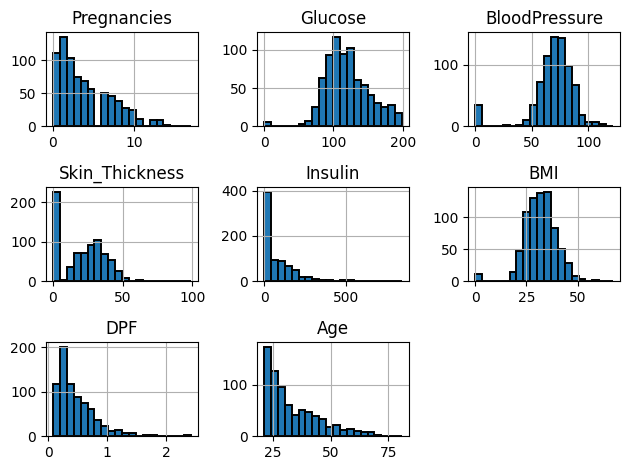

In [ ]:
plt.figure(figsize=(18, 12))
data.hist(bins=20, edgecolor='black', linewidth=1.4, layout=(3, 3))  # Adjust layout as per your preference
plt.tight_layout()
plt.show()

From Above histogram we can see DPF, Pregnancies,skin_thickness,Age and Insulin are left Skewed. We have to remove this outliers from this data.For more clarity lets check with box plot

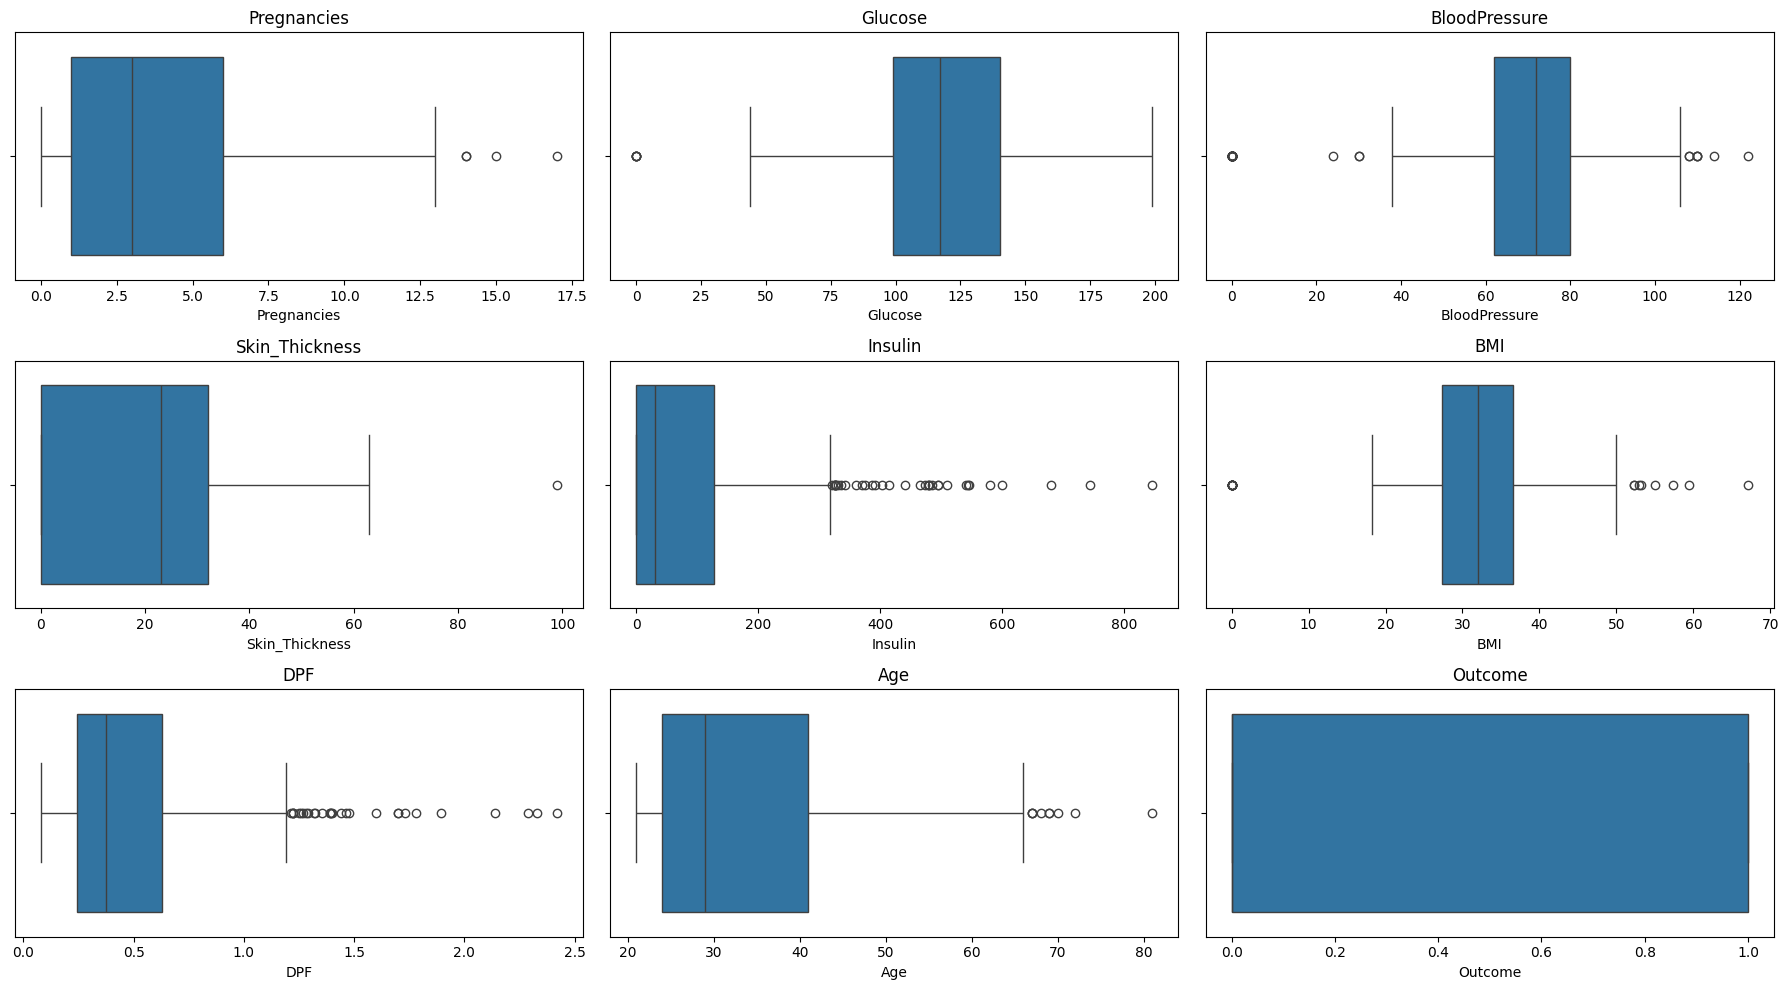

In [ ]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(data.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Removing outliers**

In [ ]:
data_cleaned= data.dropna()

In [ ]:
def remove_outliers(data_cleaned, columns):
    for col in columns:
        Q1 = data_cleaned[col].quantile(0.25)
        Q3 = data_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]
    return data_cleaned

In [ ]:
columns_to_check = ['DPF', 'Pregnancies', 'Skin_Thickness', 'Age', 'Insulin', 'BloodPressure', 'BMI','Glucose']

In [ ]:
data_cleaned1 = remove_outliers(data_cleaned, columns_to_check)

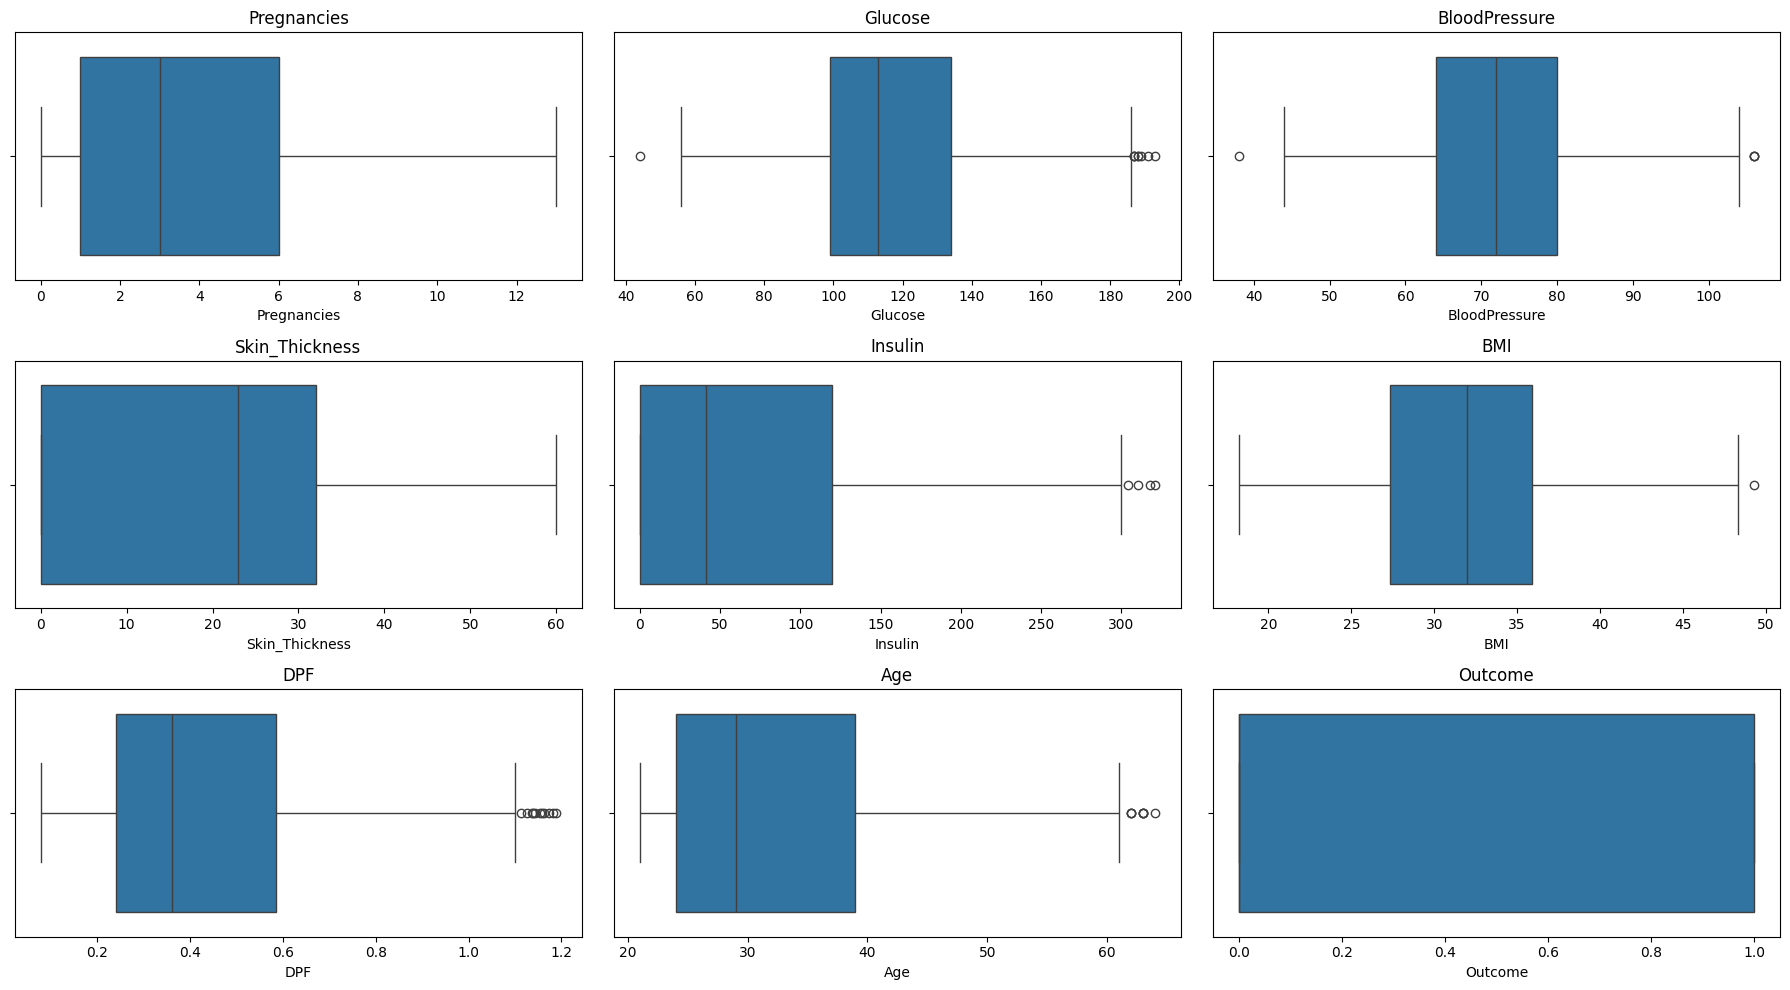

In [ ]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(data_cleaned1.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data_cleaned1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
unknown_values = data_cleaned1['Outcome'].value_counts(dropna=False)
print("Unknown values in 'Outcome' column:")
print(unknown_values)

Unknown values in 'Outcome' column:
Outcome
0    435
1    187
Name: count, dtype: int64


In [ ]:
data_cleaned1.shape

(622, 9)

From above context we can observe we have removed outliers

**Descriptive Statistics**

In [ ]:
data_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,Skin_Thickness,Insulin,BMI,DPF,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Scatter plot and Correlation analysis**

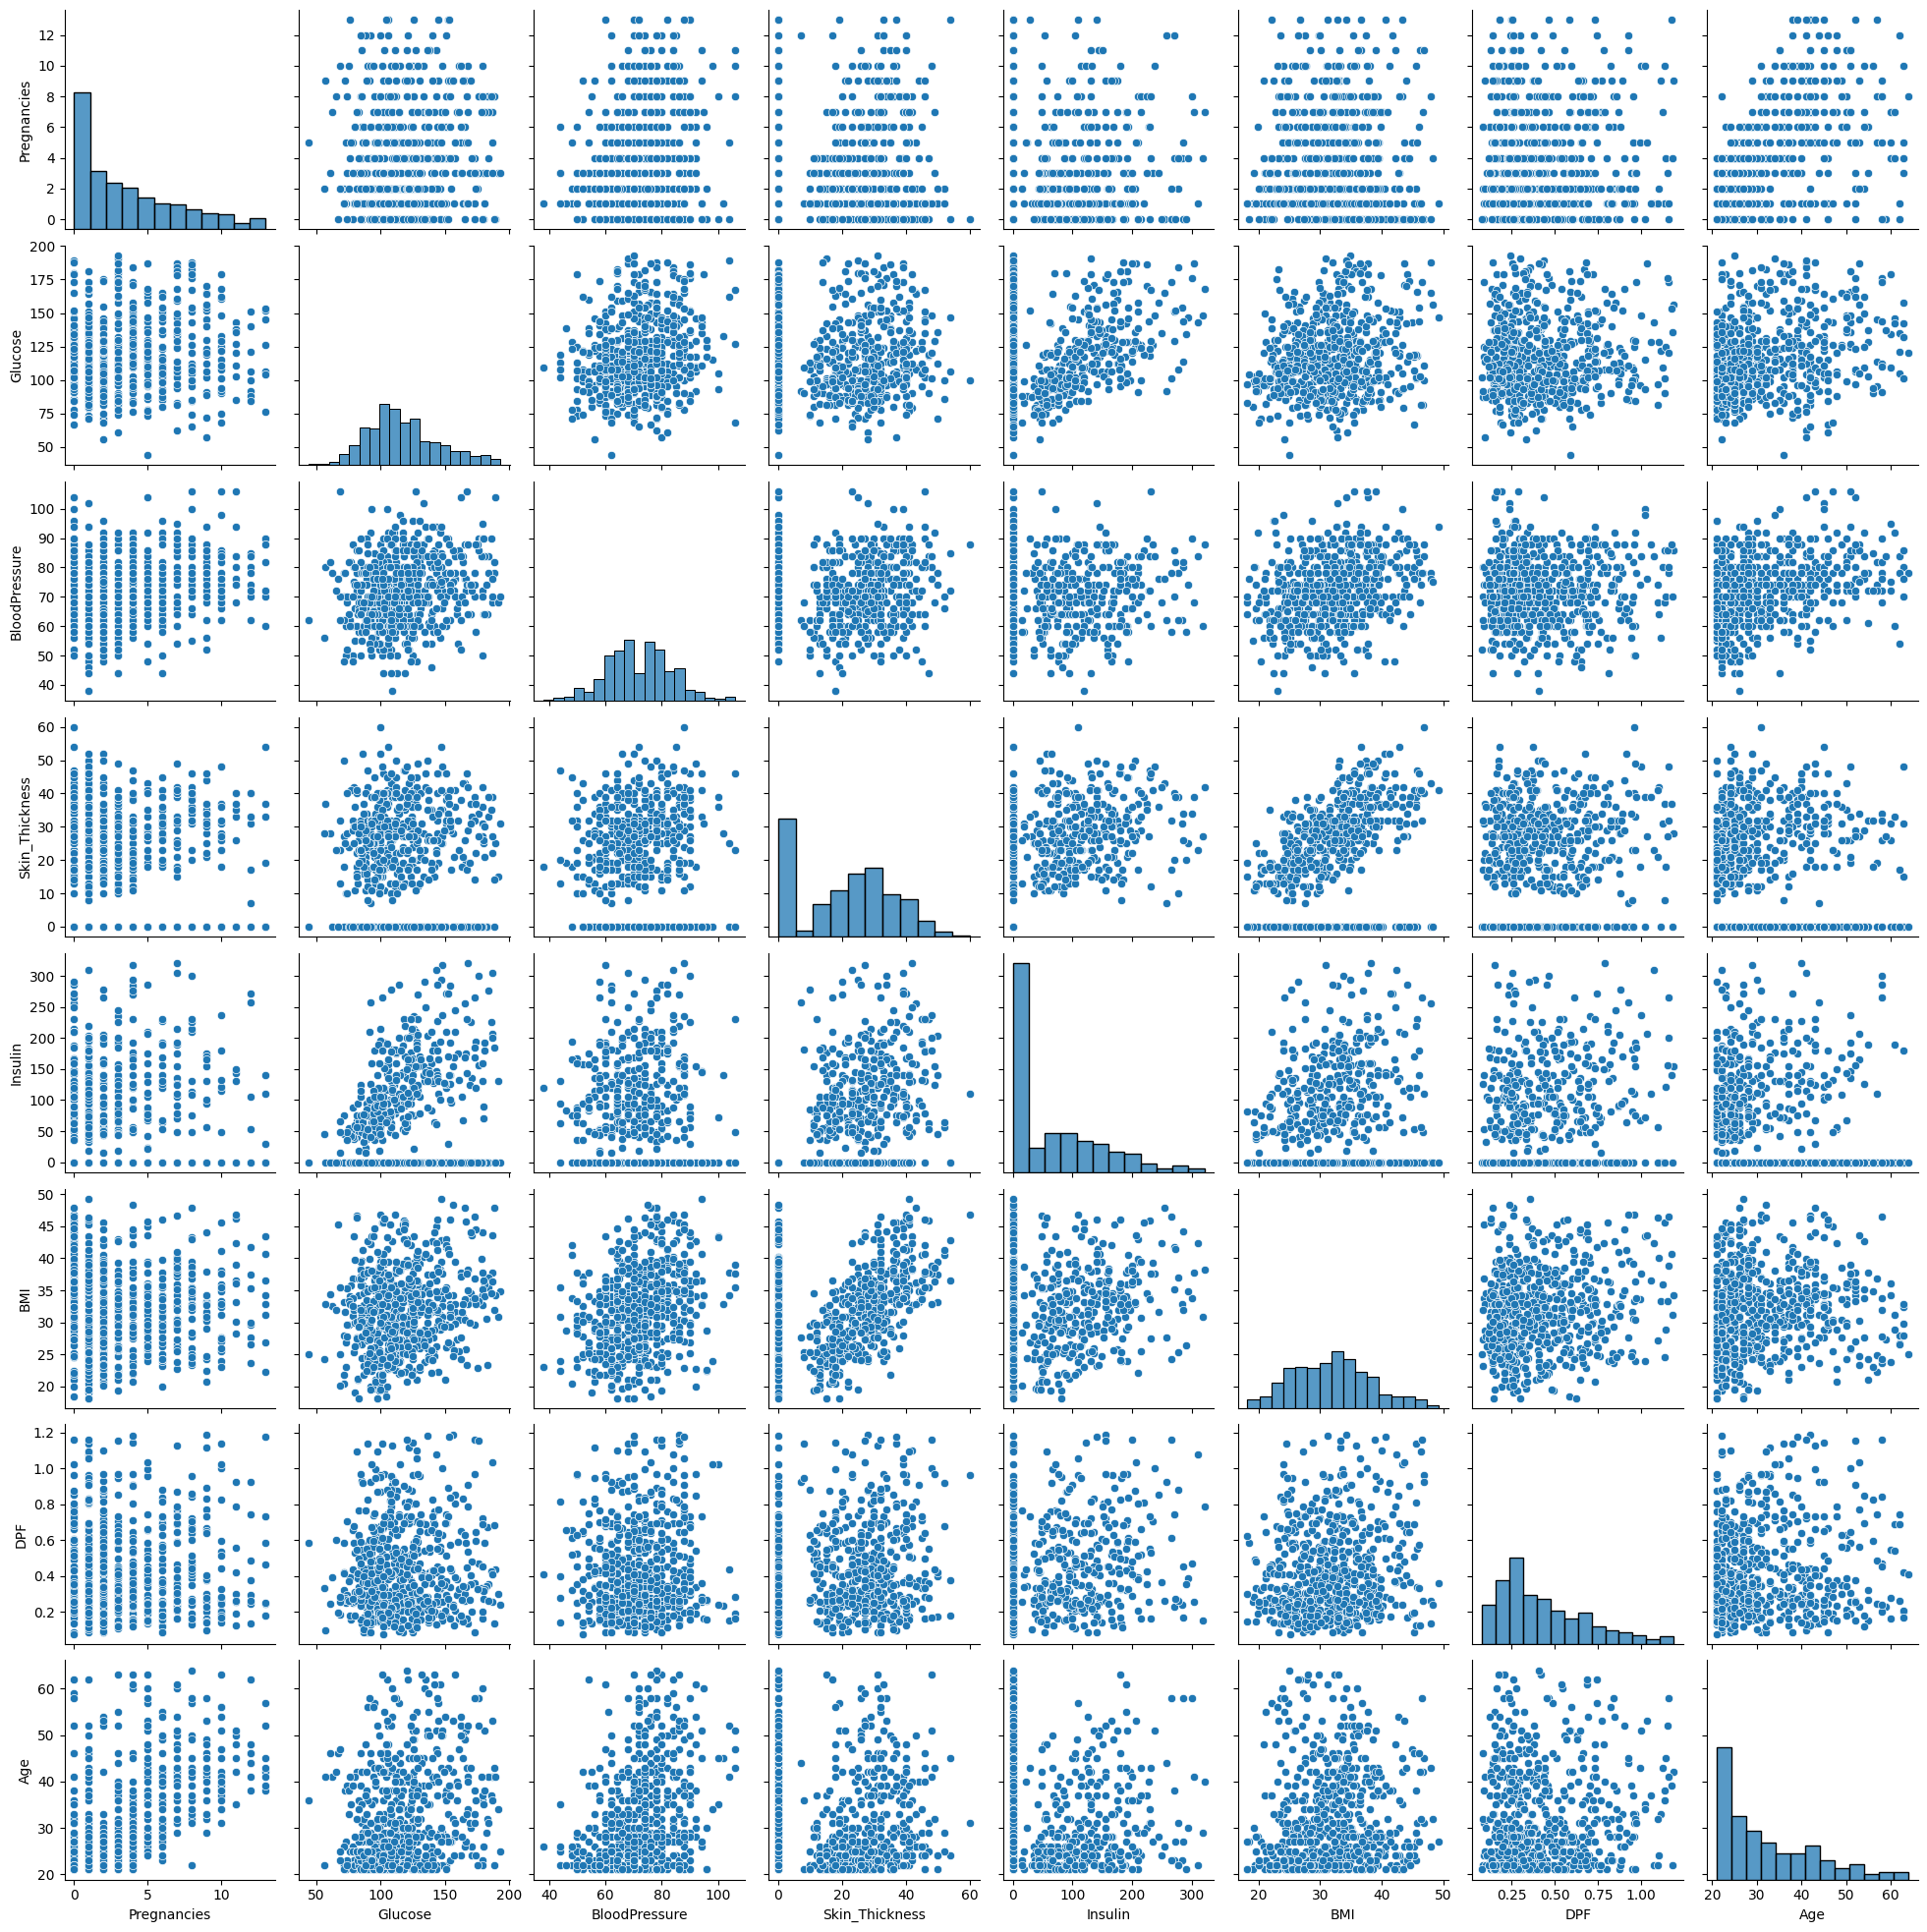

In [ ]:
sns.pairplot(data_cleaned1)

From above we can see sctter plot between columns most of the columns

**Correlation**

In [ ]:
data_cleaned1.corr()

,Pregnancies,Glucose,BloodPressure,Skin_Thickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.134898,0.209174,-0.084120,-0.102419,0.046745,0.010364,0.588393,0.229794
Glucose,0.134898,1.000000,0.243628,0.018945,0.272771,0.197965,0.060522,0.249383,0.469759
BloodPressure,0.209174,0.243628,1.000000,0.045277,-0.031399,0.297221,0.027608,0.359442,0.173726
Skin_Thickness,-0.084120,0.018945,0.045277,1.000000,0.483278,0.381158,0.155767,-0.108115,0.029684
Insulin,-0.102419,0.272771,-0.031399,0.483278,1.000000,0.186616,0.220512,-0.071944,0.098828
BMI,0.046745,0.197965,0.297221,0.381158,0.186616,1.000000,0.151089,0.089469,0.258341
DPF,0.010364,0.060522,0.027608,0.155767,0.220512,0.151089,1.000000,0.045337,0.176426
Age,0.588393,0.249383,0.359442,-0.108115,-0.071944,0.089469,0.045337,1.000000,0.266856
Outcome,0.229794,0.469759,0.173726,0.029684,0.098828,0.258341,0.176426,0.266856,1.000000


Pregnancies vs Age: Correlation coefficient is 0.588, indicating a moderate positive correlation. This suggests that as the number of pregnancies increases, age tends to increase as well.

Glucose vs Outcome: Correlation coefficient is 0.470, indicating a moderate positive correlation. This suggests that higher levels of glucose are associated with a higher likelihood of having diabetes (Outcome=1).

Skin_Thickness vs Insulin: Correlation coefficient is 0.483, indicating a moderate positive correlation. This suggests that higher skin thickness measurements tend to be associated with higher insulin levels.

<ipython-input-139-3705d1d03797>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned1['Skin_Thickness'])


<Axes: xlabel='Skin_Thickness', ylabel='Density'>

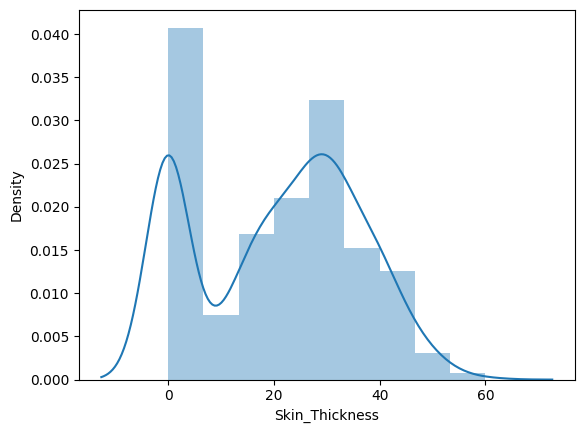

In [ ]:
sns.distplot(data_cleaned1['Skin_Thickness'])

<ipython-input-140-5a3f90d4eca5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned1['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

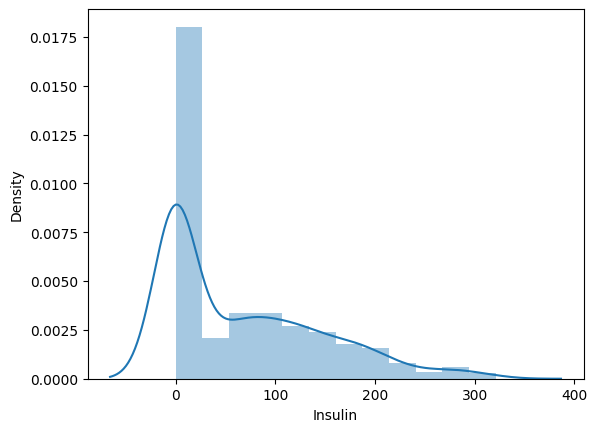

In [ ]:
sns.distplot(data_cleaned1['Insulin'])